<a href="https://colab.research.google.com/github/sepse/Noise-Pollution-Prishtina/blob/main/Noise_Pollution_HS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Noise Pollution in Prishtina
A data science project

We begin this exploratory analysis by loading the common Python libraries (pandas, numpy, matplotlib) to process and visualize the data gathered from a noise sensor. Specifically the libraries allow us to input large numerical datasets and perform standard data science operations on them, such as: formatting, cleaning missing data, visualizations, and statistical analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime


We continue by loading the dataset into the workbook, and get an initial view of the dataset, so we know what kind of format it is, its size, and if any missing values are present. In order to perform numerical processing with the Python libraries it is essential to first look at the datatypes the variables are stored in, and if they need adjusting.

In [ ]:
noise= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Noise PR/noise_PR.csv')
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169920 entries, 0 to 169919
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TIME     169920 non-null  object 
 1   NOISE_A  167349 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.6+ MB


From the 'info' command above we get a snapshot of the whole dataset which displays the two columns in the dataset, Time and Noise, and their respective Datatypes. 'Time' feature needs to be formatted as a proper date so we can perform time-series analysis, we do that below using the 'to_datetime' function. Also since we might be interested in analyzing weekdays for any noise related patterns, we will categorize weekdays so we can better understand daily statistics; in that case we add another feature to the dataset containing weekdays as text.

In [ ]:
noise['TIME'] = pd.to_datetime(noise['TIME'],utc=True)
noise['weekday'] = (noise["TIME"].dt.strftime('%A'))
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169920 entries, 0 to 169919
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   TIME     169920 non-null  datetime64[ns, UTC]
 1   NOISE_A  167349 non-null  float64            
 2   weekday  169920 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 3.9+ MB


We see that our dataset is properly formated, dates into 'Datetime', noise as 'Float64, and weekday as 'object' (meaning text)
After having solved the proper formatting, we move on to get an initial random sample data, by passing a 'sample(10)' function to the dataset below we get ten random instances.

In [ ]:
noise.sample(10)

,TIME,NOISE_A,weekday
29134,2022-12-27 05:34:00+00:00,54.20,Tuesday
123023,2023-03-02 10:23:00+00:00,55.98,Thursday
139473,2023-03-13 20:33:00+00:00,48.16,Monday
76741,2023-01-29 07:01:00+00:00,53.08,Sunday
161025,2023-03-28 19:45:00+00:00,53.72,Tuesday
54518,2023-01-13 20:38:00+00:00,53.03,Friday
62271,2023-01-19 05:51:00+00:00,54.62,Thursday
102406,2023-02-16 02:46:00+00:00,50.35,Thursday
81105,2023-02-01 07:45:00+00:00,57.65,Wednesday
140443,2023-03-14 12:43:00+00:00,51.89,Tuesday


At this point we are ready to get a visual representation of the data. Since we are dealing with time-series data, we should plot the data points on an X and Y axis, where 'Time' will be plotted horizontaly and the sound intesity vertically. We will invoke the 'plot' function of the 'Matplotlib' library and get a visual represenation.

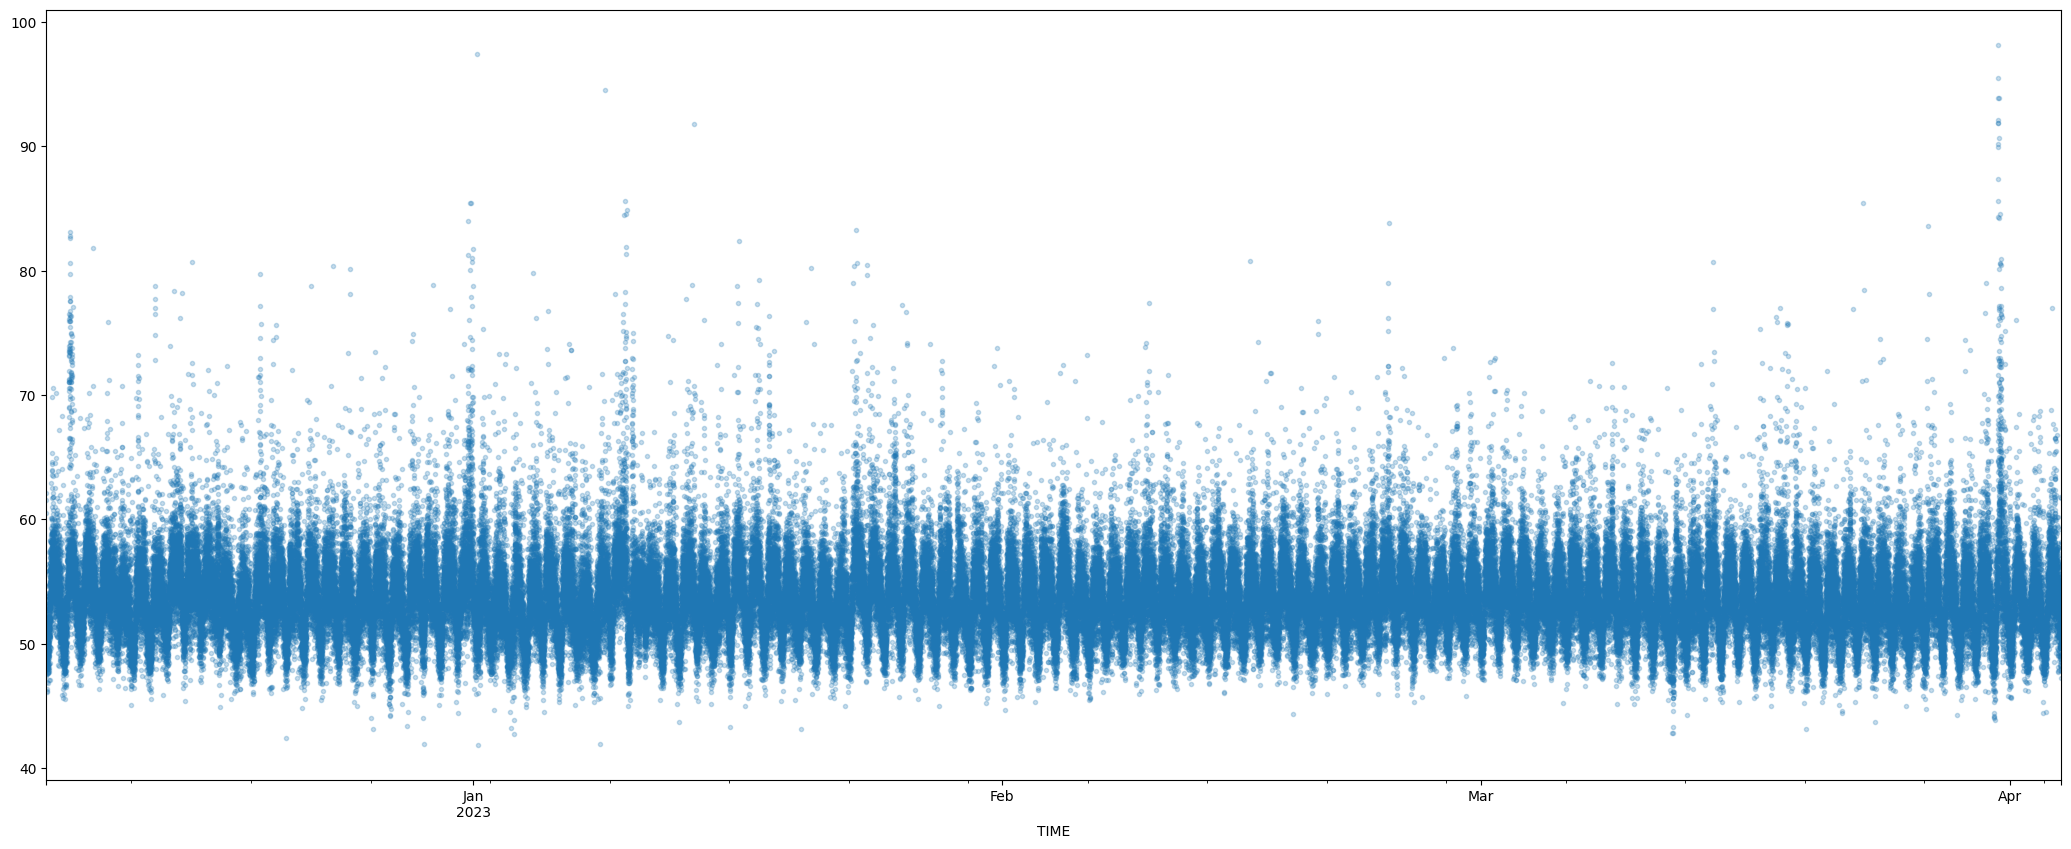

In [ ]:
noise.set_index('TIME',inplace=True)

axes = noise['NOISE_A'].plot(marker='.', alpha=0.25, linestyle='None', figsize=(26, 10), subplots=True)

On the first visual impression we can clearly see a pattern emerging, and we can understand the phenomenon on a different level - how noise levels increase and decrease during the day/night period. There is a significant baseline pattern, as well as outlier cases that describe extreme cases where the noise is beyond the normal distribution. In this case it is informative to get a descriptive statistical analysis of the data distribution; we can do that by calling a 'Describe' function on the dataset, which will give us the basic statistical description of the general dataset, by giving us the Mean/Min/Max values as well as the Standard Deviation.

In [ ]:
noise.describe()

,NOISE_A
count,167349.000000
mean,53.852123
std,3.371487
min,41.910000
25%,51.570000
50%,53.650000
75%,55.690000
max,98.170000


This information gives us an insight on the what is the likelihood of certain values to occur.

In [ ]:
noise.sample(10)

,NOISE_A,weekday,tod
TIME,,,
2023-01-01 11:19:00+00:00,54.56,Sunday,2
2023-02-17 07:37:00+00:00,52.73,Friday,2
2023-02-01 17:02:00+00:00,55.39,Wednesday,2
2023-01-24 15:39:00+00:00,56.40,Tuesday,2
2023-03-04 05:54:00+00:00,50.99,Saturday,2
2022-12-19 12:53:00+00:00,66.94,Monday,3
2022-12-28 13:07:00+00:00,55.58,Wednesday,2
2023-02-18 15:43:00+00:00,52.62,Saturday,2
2023-02-06 19:56:00+00:00,51.43,Monday,2


In [ ]:
day = noise.groupby('weekday')
  
day.ngroups

7

In [ ]:
day.describe()

NOISE_A                                                        
             count       mean       std    min    25%    50%    75%    max
weekday                                                                   
Friday     24141.0  54.124333  3.564031  43.13  51.82  53.92  55.94  98.17
Monday     24056.0  54.076594  3.524349  43.12  51.66  53.92  55.99  85.59
Saturday   24162.0  53.748715  3.238707  44.40  51.60  53.50  55.47  85.46
Sunday     24084.0  53.262003  3.068785  41.91  51.18  53.02  54.95  97.42
Thursday   24103.0  54.075671  3.430645  41.99  51.80  53.91  55.94  85.47
Tuesday    22677.0  53.724984  3.323471  42.77  51.45  53.55  55.59  80.73
Wednesday  24126.0  53.944748  3.339349  42.41  51.62  53.85  55.87  80.80

array([[<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>],
       [<Axes: xlabel='TIME'>]], dtype=object)

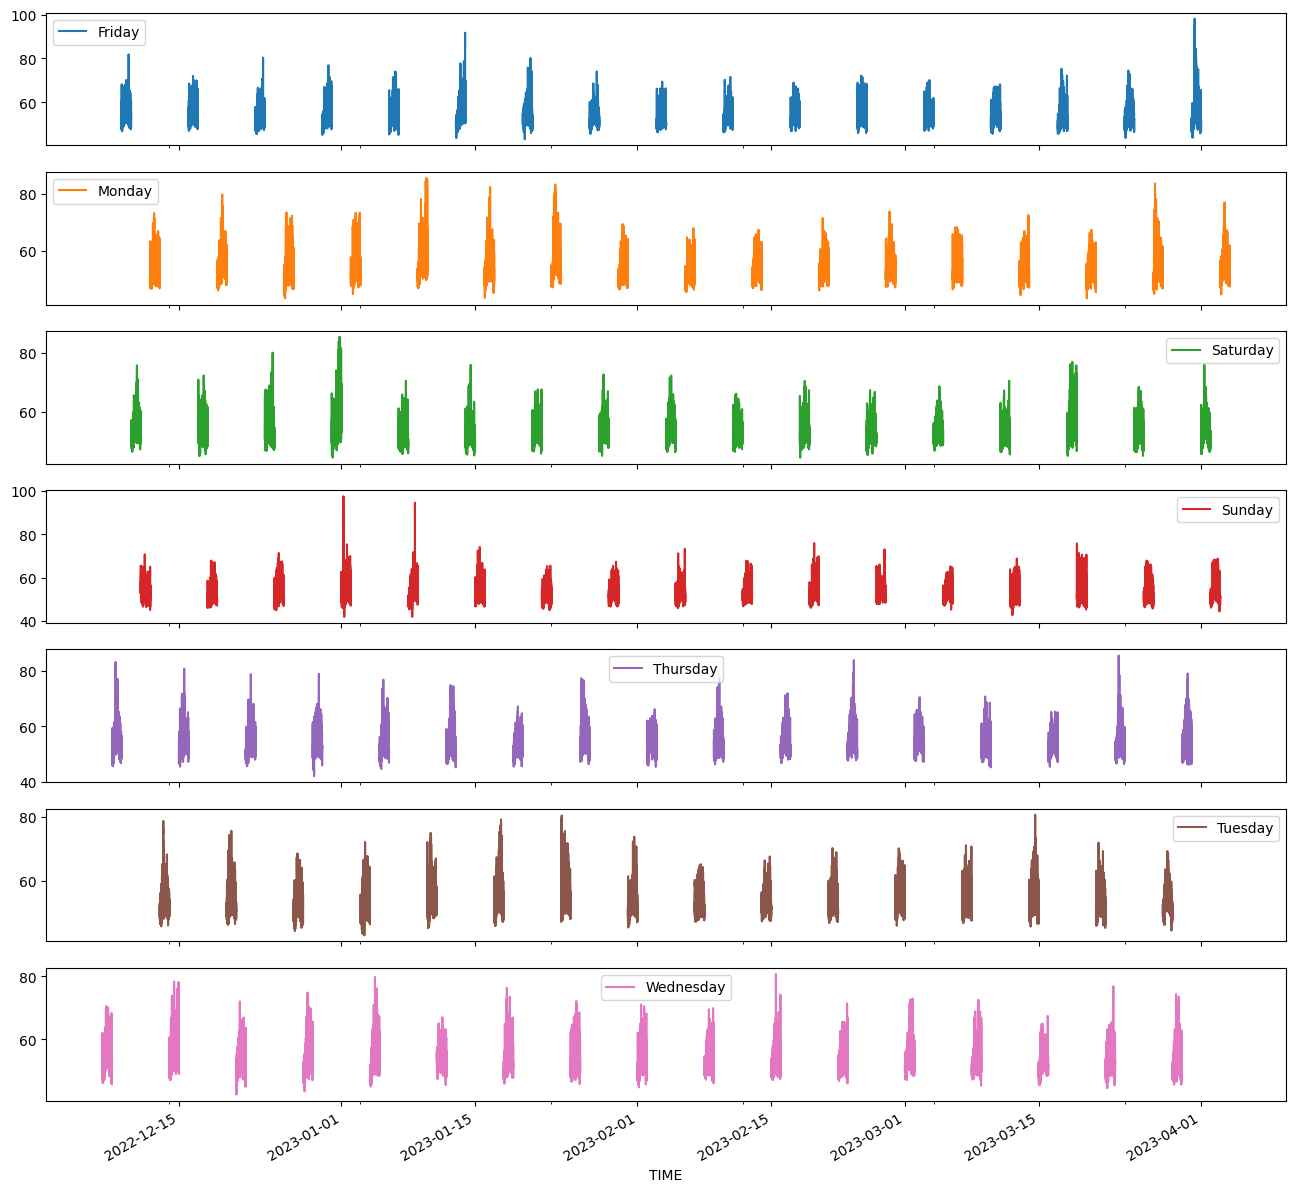

In [ ]:
pd.pivot_table(noise.reset_index(),
               index='TIME', columns='weekday', values='NOISE_A'
              ).plot(subplots=True, layout=(7,1), figsize=(16,16))

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

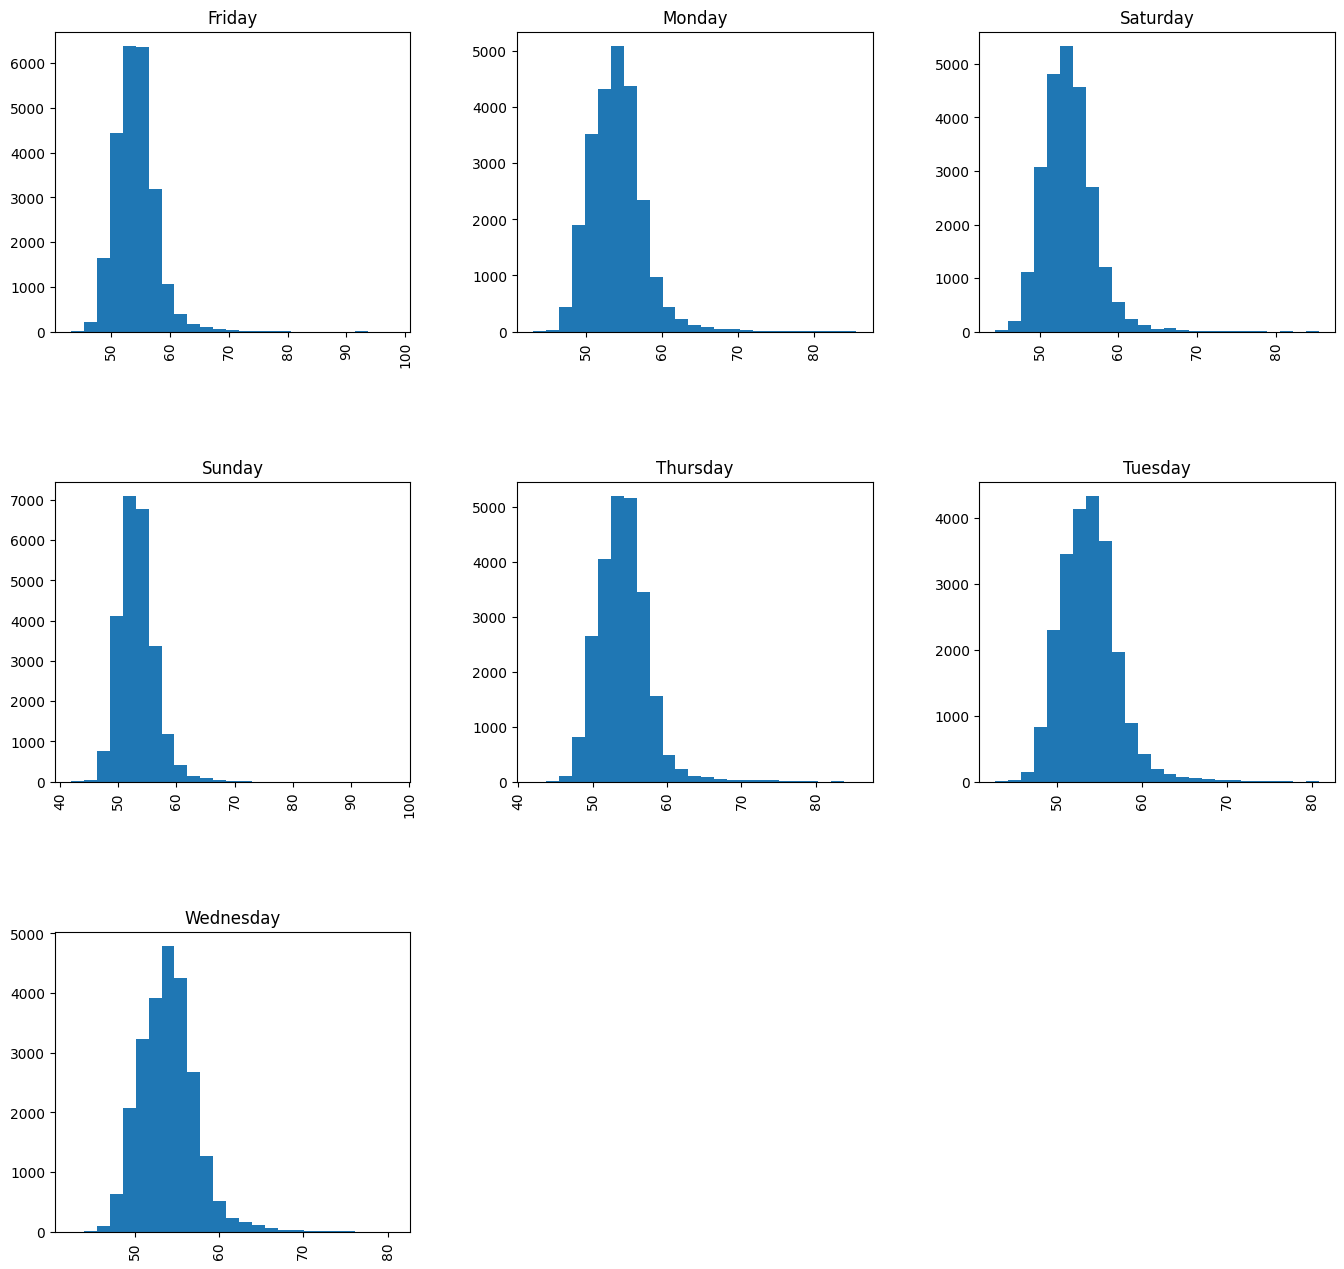

In [ ]:
noise['NOISE_A'].hist(by=noise['weekday'], figsize=(16,16), bins=25)

In [ ]:
noise["tod"] = pd.cut(noise["NOISE_A"],
                               bins=[0., 50, 60, 70, 80, np.inf],
                               labels=[1, 2, 3, 4, 5])


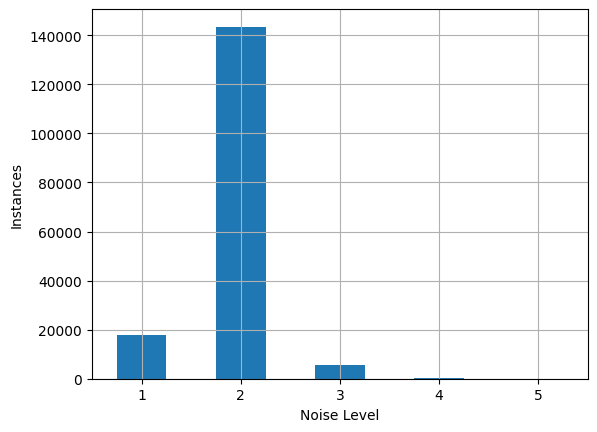

In [ ]:
noise["tod"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Noise Level")
plt.ylabel("Instances")
plt.show()